In [11]:
import numpy as np

from made import manifolds, visuals
from made.can import CAN

## Manifold

Create a Manifold and visualize the distance metric over it. 

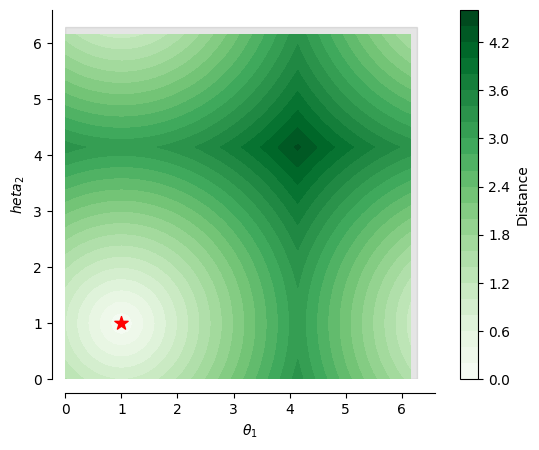

In [12]:
m = manifolds.Torus()

# define a sample point
if not isinstance(m, manifolds.Sphere):
    # manually set coordinates
    
    sample = np.array([1, 1])
else:
    # pick one neuron from the sphere
    idx = np.random.randint(0, 99)
    sample = m.parameter_space.sample(100)[idx, :]

assert m.contains(sample), "Sample point is not in the manifold"

f, ax = visuals.visualize_manifold(m, show_distances=True, distance_point=sample)


## CAN
Create a CAN and visualize the connnectivity matrix from a few sampled neurons. 

CAN(spacing=0.1, N neurons=2520)


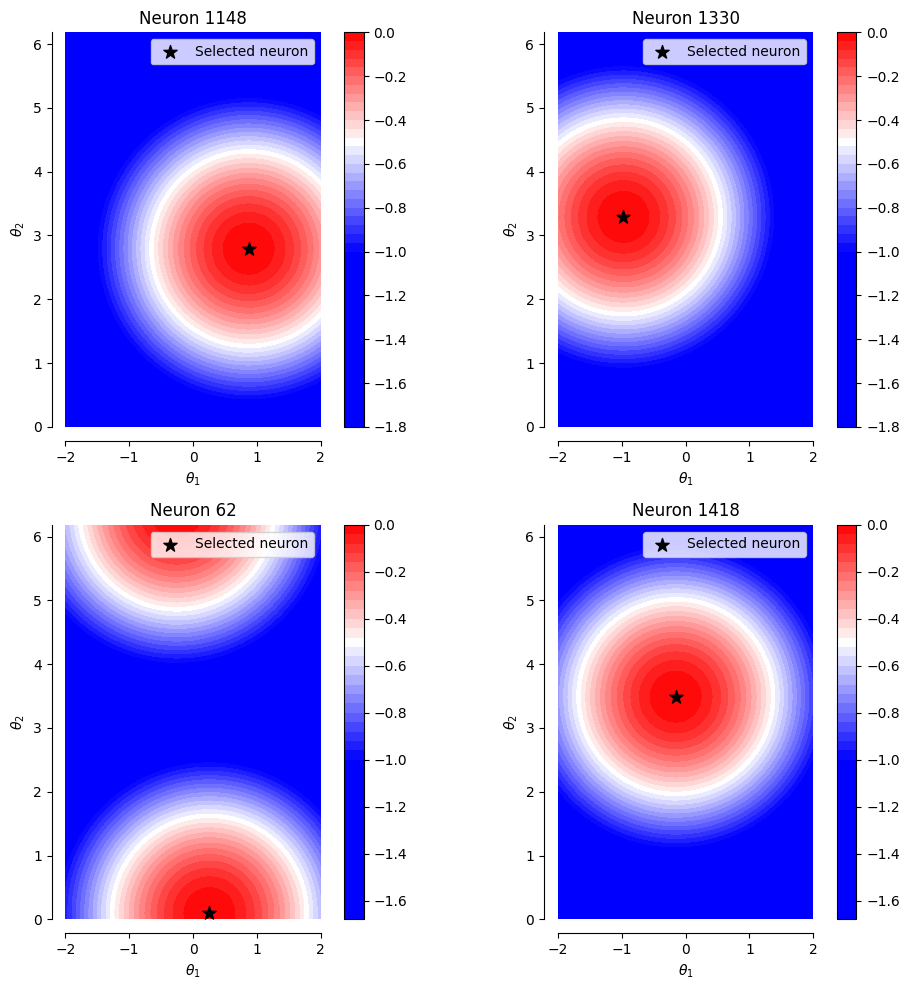

In [19]:
can = CAN.default(topology='MobiusBand')
print(can)
visuals.visualize_can_connectivity(can, );

## Plot a CAN state
We can simulate the CAN dynamics and visualize the bump over the lattice.

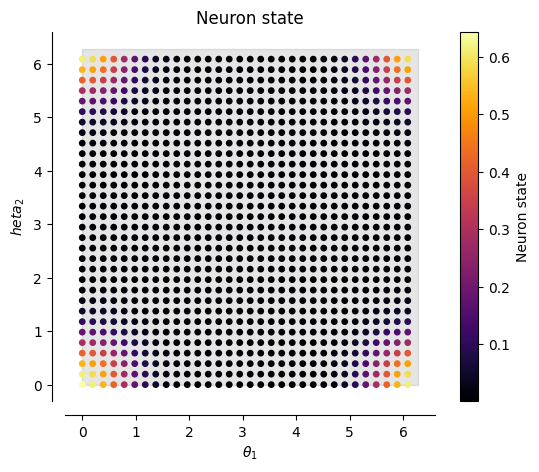

In [14]:
if isinstance(can.manifold, manifolds.Sphere):
    idx = np.random.randint(0, 99)
    sample_coords = can.manifold.parameter_space.sample(100)[idx, :]
else:
    sample_coords = [0, 0]
assert can.manifold.contains(sample_coords), "Sample coordinates not in manifold"

can.reset(mode="point", point=np.array(sample_coords))
for i in range(50):
    can()

visuals.visualize_can_state(can);